# Analyze

In [5]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df1 = pd.read_excel("correlationbetweenVariables.xlsx")
df1.head()

Saving correlationbetweenVariables.xlsx to correlationbetweenVariables (1).xlsx


,product_id,product_name,brand_name,price_usd,skin_tone,eye_color,skin_type,rating,is_recommended,helpfulness,review_text,review_title
0,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,lightMedium,green,combination,5,1.0,0.000000,I absolutely L-O-V-E this oil. I have acne pro...,A must have!
1,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,mediumTan,brown,oily,3,1.0,0.333333,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control
2,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,lightMedium,brown,dry,5,1.0,1.000000,Works well as soon as I wash my face and pat d...,Worth the money!
3,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,fair,blue,combination,5,1.0,0.933333,Super short back story- when I was in my teens...,My favorite for many years
4,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,light,hazel,combination,5,1.0,1.000000,first oil that I‚Äôve tried and I really like ...,NaN


In [6]:
num_missing = df1.isna().sum()
num_missing

,0
product_id,0
product_name,0
brand_name,0
price_usd,0
skin_tone,22449
eye_color,20923
skin_type,11236
rating,0
is_recommended,12713
helpfulness,65462


In [7]:
df1[['is_recommended', 'helpfulness']] = df1[['is_recommended', 'helpfulness']].fillna(
    df1[['is_recommended', 'helpfulness']].mean()
)

In [8]:
df1.isnull().sum()

,0
product_id,0
product_name,0
brand_name,0
price_usd,0
skin_tone,22449
eye_color,20923
skin_type,11236
rating,0
is_recommended,0
helpfulness,0


In [9]:
df1.describe()

,product_id,price_usd,rating,is_recommended,helpfulness
count,1.692940e+05,169294.000000,169294.000000,169294.000000,169294.000000
mean,5.858118e+05,57.596627,4.308097,0.845186,0.762803
std,3.522734e+06,53.740922,1.161649,0.347882,0.244294
min,2.046000e+03,3.000000,1.000000,0.000000,0.000000
25%,4.363682e+05,29.000000,4.000000,1.000000,0.762803
50%,4.671110e+05,44.000000,5.000000,1.000000,0.762803
75%,4.804470e+05,69.000000,5.000000,1.000000,1.000000
max,9.162736e+07,1900.000000,5.000000,1.000000,1.000000


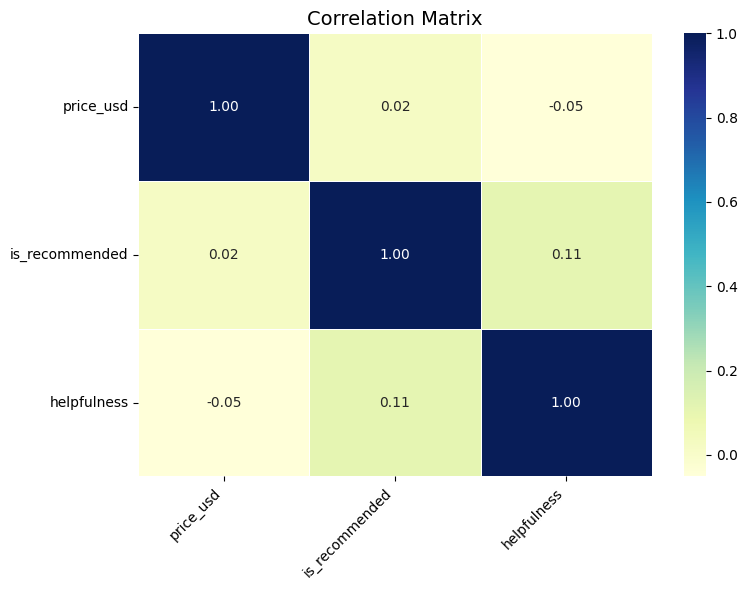

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only float (numeric) columns
float_df = df1.select_dtypes(include='float')

# Compute correlation matrix
corr_matrix = float_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# Adjust ticks and title
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()


In [11]:
#Sort by products
import google.colab.files
uploaded = google.colab.files.upload()

import pandas as pd
df2 = pd.read_excel("most_recommended_products.xlsx")
df2.head()

Saving most_recommended_products.xlsx to most_recommended_products (1).xlsx


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,brand_name,product_name,avg_rating,review_count,recommended_count,not_recommended_count
0,GUERLAIN,Abeille Royale Intense Repair Youth Oil in Balm,3.0,1,0,1
1,Tata Harper,Glow Facial Set,3.0,1,0,1
2,Sulwhasoo,Essential Comfort Balancing Emulsion,4.0,1,0,1
3,Dr. Lara Devgan Scientific Beauty,Retinol + Bakuchiol Serum 2.5x,3.0,1,0,1
4,CLINIQUE,Repairwear Uplifting Firming Cream Broad Spect...,3.4,15,0,15


In [12]:
df2.isnull().sum()

,0
brand_name,0
product_name,0
avg_rating,0
review_count,0
recommended_count,0
not_recommended_count,0


In [13]:
df2.describe()

,avg_rating,review_count,recommended_count,not_recommended_count
count,1597.000000,1597.000000,1597.000000,1597.000000
mean,4.201848,106.007514,82.867877,23.139637
std,0.522349,103.040913,88.356255,36.815021
min,1.000000,1.000000,0.000000,0.000000
25%,3.933333,19.000000,13.000000,3.000000
50%,4.287129,69.000000,46.000000,10.000000
75%,4.573864,172.000000,133.000000,28.000000
max,5.000000,492.000000,370.000000,315.000000


# **Filter**

In [14]:
import pandas as pd

df2['not_recommended_ratio'] = df2['not_recommended_count'] / df2['review_count']

to_remove = df2[
    (df2['review_count'] < 10) |
    (
        (df2['review_count'] < 19) & #25%
        (df2['avg_rating'] <= 1) & #min
        (df2['not_recommended_ratio'] >= 0.75)
    )
]

to_keep = df2.drop(to_remove.index)

print(f"Products to remove: {len(to_remove)}")
print(f"Products to keep: {len(to_keep)}")


Products to remove: 224
Products to keep: 1373


In [15]:
kept_items=to_keep[['brand_name','product_name']]
kept_items.head()

,brand_name,product_name
4,CLINIQUE,Repairwear Uplifting Firming Cream Broad Spect...
54,FOREO,Serum Serum Serum
120,CLINIQUE,Clinique Smart Clinical MD Multi-Dimensional A...
125,NuFACE,FIX Line Smoothing Device
132,HUM Nutrition,Arctic Repair Fine Lines and Wrinkles Supplement


In [16]:
kept_items = kept_items.copy()
kept_items['brand_name'] = kept_items['brand_name'].str.strip().str.lower()
kept_items['product_name'] = kept_items['product_name'].str.strip().str.lower()
print(len(kept_items))
kept_items.head()

1373


,brand_name,product_name
4,clinique,repairwear uplifting firming cream broad spect...
54,foreo,serum serum serum
120,clinique,clinique smart clinical md multi-dimensional a...
125,nuface,fix line smoothing device
132,hum nutrition,arctic repair fine lines and wrinkles supplement


In [48]:
# Clean both DataFrames exactly the same way
df1['brand_name'] = df1['brand_name'].astype(str).str.strip().str.lower()
df1['product_name'] = df1['product_name'].astype(str).str.strip().str.lower()

kept_items['brand_name'] = kept_items['brand_name'].astype(str).str.strip().str.lower()
kept_items['product_name'] = kept_items['product_name'].astype(str).str.strip().str.lower()

# Create product keys
df1['product_key'] = list(zip(df1['brand_name'], df1['product_name']))
kept_keys = set(zip(kept_items['brand_name'], kept_items['product_name']))

# Filter based on matched keys
matched_df1 = df1[df1['product_key'].isin(kept_keys)].drop(columns='product_key')
df1=matched_df1
print(len(df1))
df1.head()

168267


,product_id,product_name,brand_name,price_usd,skin_tone,eye_color,skin_type,rating,is_recommended,helpfulness,review_text,review_title
0,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,lightMedium,green,combination,5,1.0,0.000000,I absolutely L-O-V-E this oil. I have acne pro...,A must have!
1,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,mediumTan,brown,oily,3,1.0,0.333333,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control
2,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,lightMedium,brown,dry,5,1.0,1.000000,Works well as soon as I wash my face and pat d...,Worth the money!
3,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,fair,blue,combination,5,1.0,0.933333,Super short back story- when I was in my teens...,My favorite for many years
4,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,light,hazel,combination,5,1.0,1.000000,first oil that I‚Äôve tried and I really like ...,NaN


In [18]:
df1.describe()

,product_id,price_usd,rating,is_recommended,helpfulness
count,1.682670e+05,168267.000000,168267.000000,168267.000000,168267.000000
mean,5.864787e+05,57.476281,4.309811,0.845769,0.762762
std,3.533457e+06,52.779495,1.159461,0.347231,0.244281
min,2.046000e+03,3.000000,1.000000,0.000000,0.000000
25%,4.363530e+05,29.000000,4.000000,1.000000,0.762803
50%,4.661140e+05,44.000000,5.000000,1.000000,0.762803
75%,4.803580e+05,69.000000,5.000000,1.000000,1.000000
max,9.162736e+07,449.000000,5.000000,1.000000,1.000000


# **MACHINE LEARNING**

**Why there are low ratings? -> What is the right customer for that product?**

In [19]:
#checking low rating products
print(df1[df1['rating'] == 2].head(3))

    product_id                                       product_name brand_name  \
18      379064  lotus balancing & hydrating natural face treat...    clarins   
33      379064  lotus balancing & hydrating natural face treat...    clarins   
38      379064  lotus balancing & hydrating natural face treat...    clarins   

    price_usd skin_tone eye_color    skin_type  rating  is_recommended  \
18       65.0      fair     hazel  combination       2        0.000000   
33       65.0       NaN       NaN          NaN       2        1.000000   
38       65.0       NaN       NaN          NaN       2        0.845186   

    helpfulness                                        review_text  \
18     1.000000  It works well as a moisturizing oil, but it di...   
33     0.762803  I have Oily skin, mainly in my t-zone. used th...   
38     0.333333  This is the first time I felt the need to revi...   

                   review_title  
18  Moisturizes but that‚Äôs it  
33                          NaN  

In [20]:
low_rating_reviews = df1[(df1['is_recommended'] == 0) & (df1['rating'] < 3)]
print(low_rating_reviews.head(3))

     product_id                                       product_name  \
18       379064  lotus balancing & hydrating natural face treat...   
276      474843  absolue soft cream revitalizing & brightening ...   
284      422003                         daily reviving concentrate   

             brand_name  price_usd skin_tone eye_color    skin_type  rating  \
18              clarins       65.0      fair     hazel  combination       2   
276            lanc√¥me      150.0    medium     brown         oily       2   
284  kiehl's since 1851       59.0     light     hazel  combination       1   

     is_recommended  helpfulness  \
18              0.0         1.00   
276             0.0         0.40   
284             0.0         0.75   

                                           review_text  \
18   It works well as a moisturizing oil, but it di...   
276  This made my face break out. But it‚Äôs soft a...   
284  I was not happy with this product.  I didn‚Äôt...   

                    revi

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Make a copy to avoid SettingWithCopyWarning
low_rating_reviews = low_rating_reviews.copy()

# Apply text cleaning
low_rating_reviews['cleaned_text'] = low_rating_reviews['review_text'].apply(clean_text)

EXTRACT "OILY", "CAUSED BREAKOUTS" (Topic Modeling (LDA))
*   Use BERT for More Contextual Clustering

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Step 1: Tokenize cleaned text
texts = low_rating_reviews['cleaned_text'].apply(lambda x: x.split()).tolist()
# Step 2: Create Dictionary and Corpus
id2word = Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

In [72]:

# Step 3: Function to compute coherence for different topic numbers
def compute_coherence_values(texts, start, limit, step):
    coherence_values = []
    models = []

    for num_topics in range(start, limit, step):
        vectorizer = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')
        X = vectorizer.fit_transform(low_rating_reviews['cleaned_text'])

        lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        lda_model.fit(X)

        topics = [[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
                  for topic in lda_model.components_]

        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        models.append(lda_model)

    return models, coherence_values

In [73]:
# Step 4: Run coherence evaluation
models, coherence_values = compute_coherence_values(texts, start=2, limit=11, step=1)

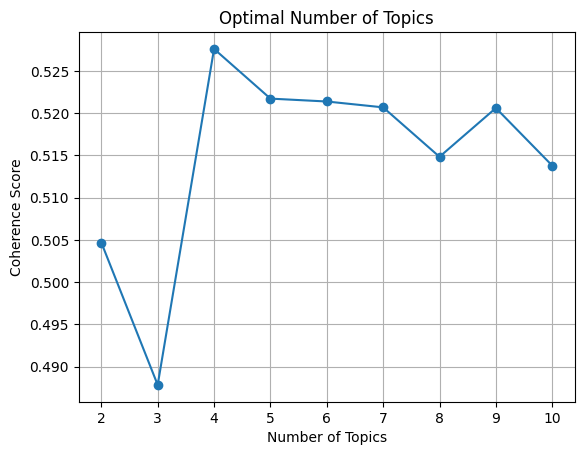

In [74]:
# Step 5: Plot coherence values
x = range(2, 11)
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.grid(True)
plt.show()

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')
X = vectorizer.fit_transform(low_rating_reviews['cleaned_text'])

lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(X)

# Display top keywords in each topic
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic #{idx+1}:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-top_n - 1:-1]])
        print()

print_topics(lda, vectorizer)

Topic #1:
['skin', 'face', 'like', 'product', 'dry', 'really', 'didnäôt', 'felt', 'love', 'feel']

Topic #2:
['eye', 'cream', 'makeup', 'like', 'itäôs', 'product', 'face', 'skin', 'doesnäôt', 'eyes']

Topic #3:
['skin', 'product', 'didnäôt', 'using', 'itäôs', 'acne', 'used', 'really', 'products', 'donäôt']

Topic #4:
['product', 'like', 'itäôs', 'smell', 'use', 'money', 'donäôt', 'iäôm', 'bottle', 'smells']



In [77]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(low_rating_reviews['cleaned_text'])

In [79]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=4, random_state=42)
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=4, random_state=42)

VISUALIZE THE TOPIC

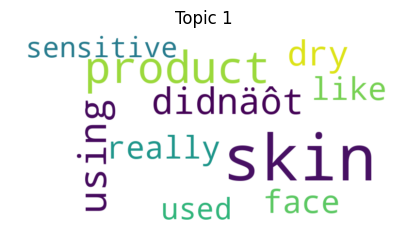

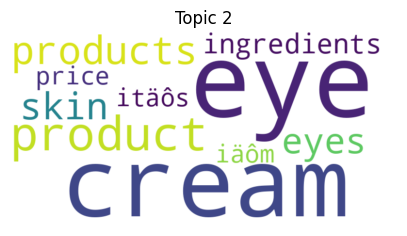

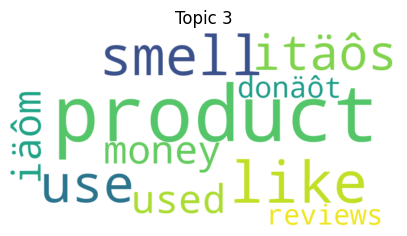

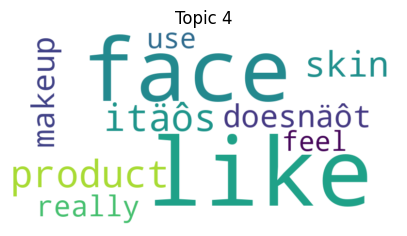

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic in enumerate(lda_model.components_):
    plt.figure(figsize=(5, 3))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({vectorizer.get_feature_names_out()[j]: topic[j] for j in topic.argsort()[-10:]})
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {i+1}")
    plt.show()

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic in enumerate(lda.components_):  # use lda_model.components_ if needed
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies({
        vectorizer.get_feature_names_out()[j]: topic[j]
        for j in topic.argsort()[-10:]
    })

    # Save the image
    filename = f"/content/topic_{i+1}_wordcloud.png"
    wordcloud.to_file(filename)
    print(f"Saved: {filename}")

Saved: /content/topic_1_wordcloud.png
Saved: /content/topic_2_wordcloud.png
Saved: /content/topic_3_wordcloud.png
Saved: /content/topic_4_wordcloud.png


In [82]:
from google.colab import files
for i in range(1, 5):
    files.download(f"/content/topic_{i}_wordcloud.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Check Topic Distribution Across Reviews

In [83]:
topic_distributions = lda_model.transform(doc_term_matrix)

In [84]:
import numpy as np
low_rating_reviews['dominant_topic'] = np.argmax(topic_distributions, axis=1)

In [85]:
topic_results_df = low_rating_reviews[['review_text', 'cleaned_text', 'dominant_topic']]

In [86]:
topic_distribution = topic_results_df['dominant_topic'].value_counts().sort_index()
print(topic_distribution)

dominant_topic
0    5801
1    2144
2    3741
3    4203
Name: count, dtype: int64


In [87]:
for topic_num in range(lda_model.n_components):
    print(f"\n--- Topic {topic_num + 1} ---")
    print(low_rating_reviews[topic_results_df['dominant_topic'] == topic_num]['review_text'].iloc[0])


--- Topic 1 ---
It works well as a moisturizing oil, but it didn‚Äôt improve my skin‚Äôs texture any. The scent is just okay‚Äî very earthy. I will use it up but not buy again

--- Topic 2 ---
Disappointed, the Peter Thomas Roth clinical works much better for sun spots.

--- Topic 3 ---
Did not lighten melasma spots.  It actually made dark spot worse. Tried to return after 60 days but Store refused to take it back.

--- Topic 4 ---
This oil is quite runny and thin and you got to work with it quite quickly literally.... if you put it on your palms.... it will get soaked right in and you‚Äôll have little or no product for your face, so you got to put it directly onto your face and because it drips down quickly you have to speed up the process of application. I didn‚Äôt see any results after using this product, didn‚Äôt feel any difference.... don‚Äôt like how oily it leaves my skin after.


**Coherence Score**


*   Measures how interpretable the topics are by checking the semantic similarity of top words in a topic.

*  Higher coherence = better, more meaningful topics.






In [88]:
!pip install --upgrade numpy
!pip install --upgrade gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  A

In [89]:
!pip install gensim

In [90]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

#1: Tokenized texts
texts = low_rating_reviews['cleaned_text'].apply(lambda x: x.split()).tolist()
#2: Create Gensim Dictionary from texts
id2word = Dictionary(texts)
#3: Convert sklearn topics (lda_model.components_) to word tokens
topics = []
feature_names = vectorizer.get_feature_names_out()
for topic_weights in lda_model.components_:
    top_word_indices = topic_weights.argsort()[-10:]  # Top 10 words
    top_words = [feature_names[i] for i in top_word_indices]
    topics.append(top_words)
#4: Compute Coherence
coherence_model = CoherenceModel(
    topics=topics,
    texts=texts,
    dictionary=id2word,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print(f"\nModel Coherence Score: {coherence_score:.4f}")


Model Coherence Score: 0.5328


--> Moderate

# **TABLE**
Customer segmentation: Match product to users more likely to enjoy it.

Personalized recommendations: Warn users before buying ("Not ideal for dry skin").

Marketing improvement: Focus on the product strengths based on who it works best for.

In [98]:
# Define customer traits per topic
topic_customer_map = {
    0: "Normal/oily skin, non-reactive users",
    1: "Users applying away from eyes",
    2: "Normal skin, users seeking hydration",
    3: "Users comfortable with scented products"
}

In [99]:
# Add dominant topic to each review
low_rating_reviews['dominant_topic'] = topic_results_df['dominant_topic']

# Map ideal customers
low_rating_reviews['ideal_customer'] = low_rating_reviews['dominant_topic'].map(topic_customer_map)

In [100]:
product_customer_fit = low_rating_reviews.groupby(['brand_name', 'product_name'])['ideal_customer'] \
                                         .agg(lambda x: x.mode()[0] if not x.mode().empty else "Mixed") \
                                         .reset_index()

product_customer_fit.columns = ['Brand', 'Product', 'Ideal Customer']
product_customer_fit.head(10)  # View first 10 entries

,Brand,Product,Ideal Customer
0,algenist,10 day results kit,"Normal/oily skin, non-reactive users"
1,algenist,aa (alguronic acid) barrier serum,"Normal skin, users seeking hydration"
2,algenist,advanced anti-aging repairing oil,Users applying away from eyes
3,algenist,algae niacinamide moisture veil,"Normal/oily skin, non-reactive users"
4,algenist,alive prebiotic balancing mask,"Normal/oily skin, non-reactive users"
5,algenist,alive prebiotic balancing moisturizer spf 15,"Normal/oily skin, non-reactive users"
6,algenist,blue algae vitamin c dark spot correcting peel,"Normal/oily skin, non-reactive users"
7,algenist,blue algae vitamin c skinclarity brightening s...,"Normal/oily skin, non-reactive users"
8,algenist,elevate advanced lift contouring cream,Users applying away from eyes
9,algenist,elevate advanced retinol serum,"Normal/oily skin, non-reactive users"


1.   Pull example reviews per topic to back up these insights.
2.   Turn this into a recommendation rule engine.
3.   Visualize it



In [101]:
for topic_num in range(lda_model.n_components):
    print(f"\n--- Topic {topic_num + 1} ---")
    examples = low_rating_reviews[topic_results_df['dominant_topic'] == topic_num]['review_text'].head(3)
    for i, review in enumerate(examples, 1):
        print(f"Example {i}: {review}\n")


--- Topic 1 ---
Example 1: It works well as a moisturizing oil, but it didn‚Äôt improve my skin‚Äôs texture any. The scent is just okay‚Äî very earthy. I will use it up but not buy again

Example 2: This made my face break out. But it‚Äôs soft and smells nice, and I am currently using it as elbow cream. Works wonders there.

Example 3: I was not happy with this product.  I didn‚Äôt like the fragrance at all and my skin did not like this formula!! I would not recommend this product.  Made my skin worse.


--- Topic 2 ---
Example 1: Disappointed, the Peter Thomas Roth clinical works much better for sun spots.

Example 2: I would rate this a negative 10 if a could for the lack of research and the inexperience/incompetence of the person(s) who formulated this product. I did not see any results. No brightening, increases smoothness, nothing, and here‚Äôs why that is to be expected: this product contains both ascorbic acid (vitamin c) and glycolic acid, both are great to include in your ski

In [102]:
topic_insights = {
    0: "Not suitable for sensitive or dry skin types",
    1: "Avoid for customers using heavy eye makeup or with sensitive eye area",
    2: "Might trigger breakouts or not effective for acne-prone users",
    3: "Strong scent – avoid if sensitive to fragrance or seeking value",
}


def recommend_product(row):
    topic = topic_results_df.loc[row.name, 'dominant_topic']
    return f"Recommendation: {topic_insights[topic]}"

low_rating_reviews['recommendation'] = low_rating_reviews.apply(recommend_product, axis=1)
low_rating_reviews[['review_text', 'recommendation']].head()

,review_text,recommendation
18,"It works well as a moisturizing oil, but it di...",Recommendation: Not suitable for sensitive or ...
276,This made my face break out. But it‚Äôs soft a...,Recommendation: Not suitable for sensitive or ...
284,I was not happy with this product. I didn‚Äôt...,Recommendation: Not suitable for sensitive or ...
289,This oil is quite runny and thin and you got t...,Recommendation: Strong scent – avoid if sensit...
296,I did not see ANY difference in my skin. Waste...,Recommendation: Not suitable for sensitive or ...


In [103]:
import plotly.express as px

topic_counts = topic_results_df['dominant_topic'].value_counts().sort_index()
bubble_data = pd.DataFrame({
    'Topic': topic_counts.index,
    'Reviews': topic_counts.values,
    'Insight': [topic_insights[i] for i in topic_counts.index],
})

fig = px.scatter(bubble_data, x="Topic", y="Reviews", size="Reviews", text="Insight",
                 title="Negative Review Topics and Their Frequencies",
                 size_max=60)
fig.show()